In [1]:
#loading modules
from newsapi.newsapi_client import NewsApiClient #newsapi
from nltk.sentiment.vader import SentimentIntensityAnalyzer #newsanalyzer
import pandas as pd
from datetime import datetime, timedelta
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import spacy
from spacy import displacy

In [2]:
# Read your api key environment variable
newsapi=NewsApiClient(api_key='458f210fd8d34c7b9e5755c3c4beb6a3')

In [3]:
#setting up datetime for news search to find last 3 days
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()
date = datetime.strptime(current_date[:10], "%Y-%m-%d")
end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")

In [4]:

#creating search for specific headlines
bitcoin_news=newsapi.get_everything(q='Bitcoin')
ethereum_news=newsapi.get_everything(q='Ethereum')

In [5]:

#Initializing sentiment analyzer
sid=SentimentIntensityAnalyzer()

# Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for headline in headlines:
        sentiment_score=sid.polarity_scores(headline)['compound']
        sentiment.append(sentiment_score)
        
    return sentiment

In [6]:
#for-loop to append all btc news
bitcoin_headline=[]
for articles in bitcoin_news['articles']:
    bitcoin_headline.append(articles['content'])

#for-loop to append all eth news
eth_headline=[]
for articles in ethereum_news['articles']:
    eth_headline.append(articles['content'])

In [7]:
#average of each topic sentiment
btc_avg=headline_sentiment_summarizer_avg(bitcoin_headline)
eth_avg=headline_sentiment_summarizer_avg(eth_headline)

In [8]:
# Combine Sentiment Averages into DataFrame
topic_sentiments = pd.DataFrame(
    {"Bitcoin Average": btc_avg,
        "Ethereum Average": eth_avg},
        index=['Article 1','Article 2','Article 3','Article 4','Article 5','Article 6','Article 7','Article 8','Article 9','Article 10','Article 11','Article 12','Article 13','Article 14','Article 15','Article 16','Article 17','Article 18','Article 19','Article 20'])
topic_sentiments

,Bitcoin Average,Ethereum Average
Article 1,0.6908,0.3612
Article 2,-0.5719,-0.2411
Article 3,-0.6124,0.7264
Article 4,0.6240,0.3400
Article 5,0.7264,0.3612
Article 6,0.4939,0.6369
Article 7,0.1280,0.0000
Article 8,-0.4767,0.7717
Article 9,0.0000,0.6249
Article 10,0.0000,0.0000


In [9]:
print ('Bitcoin has the highest score on average of .289760, while ETH was 0.275544')
print ('Bitcoin has the highest positive score of .845500, while ETH was 0.817600')
print ('Bitcoin also has the highest negative score of -.762700, while ETH was -0.401900')
print ('---------------------------------------------------------------------------------------')
topic_sentiments.describe()

Bitcoin has the highest score on average of .289760, while ETH was 0.275544
Bitcoin has the highest positive score of .845500, while ETH was 0.817600
Bitcoin also has the highest negative score of -.762700, while ETH was -0.401900
---------------------------------------------------------------------------------------


,Bitcoin Average,Ethereum Average
count,20.000000,20.000000
mean,0.054875,0.247720
std,0.496213,0.326828
min,-0.827100,-0.340000
25%,-0.119175,0.000000
50%,0.000000,0.295000
75%,0.467575,0.528675
max,0.726400,0.771700


In [10]:

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

#creating stopwords
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [11]:
bit1=bitcoin_news['articles'][15]['content']
eth1=ethereum_news['articles'][15]['content']

In [12]:
#creating function to find stopwords from first bitcoin article
def process_text(bit1):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', bit1)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
print(set(process_text(bit1)))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\tavar/nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tavar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [13]:
#stopwords from article of bitcoin with strongest emotion
btc_stopwords=print(set(process_text(bit1)))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\tavar/nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tavar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [14]:
#stopwords from article of ethereum with strongest emotion

eth_stopwords=print(set(process_text(eth1)))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\tavar/nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tavar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [15]:
#tokenize words
btc_token_words=word_tokenize(bit1)
eth_token_words=word_tokenize(eth1)
#convert words to lowercase
lw_btc=list(filter(lambda t: t not in punctuation, btc_token_words))
lw_eth=list(filter(lambda t: t not in punctuation, eth_token_words))

#remove punctuation
btc_punctuation = list(filter(lambda t: t not in punctuation, btc_token_words))
eth_punctuation= list(filter(lambda t: t not in punctuation, eth_token_words

#remove stopwords
words = list(filter(lambda t: t.lower() not in btc_stopwords, btc_token_words))
eth_words= list(filter(lambda t: t.lower() not in eth_stopwords, eth_token_words))
#unable to remove stopwords

# Lemmatize Words into root words
btc_lem = lemmatizer(btc_stopwords)
eth_lem= lemmatizer(eth_stopwords)
#unable to lemmatize

#create bitcoin column
topic_sentiments['btc tokens']=topic_sentiments.text.apply(btc_token_words)
topic_sentiments['eth tokens']=topic_sentiments.text.apply(btc_token_words)
#unable to create

SyntaxError: invalid syntax (<ipython-input-15-97901e4b515d>, line 13)

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
btc_process=(process_text(bit1))
print(btc_process)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\tavar/nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tavar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [18]:
eth_process=process_text(eth1)
print(eth_process)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\tavar/nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\tavar\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\tavar\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
btc_word_counts= Counter(btc_process)
btc_word_counts

NameError: name 'btc_process' is not defined

In [20]:
eth_word_counts= Counter(eth_process)
eth_word_counts

NameError: name 'eth_process' is not defined

In [21]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_process, n=2))
print(dict(btc_bigram_counts))

NameError: name 'btc_process' is not defined

In [22]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_process, n=2))
print(dict(eth_bigram_counts))

NameError: name 'eth_process' is not defined

In [23]:
#top 10 words for eth
print(dict(eth_bigram_counts.most_common()))

NameError: name 'eth_bigram_counts' is not defined

In [24]:
#top 10 words for btc
print(dict(btc_bigram_counts.most_common()))

NameError: name 'btc_bigram_counts' is not defined

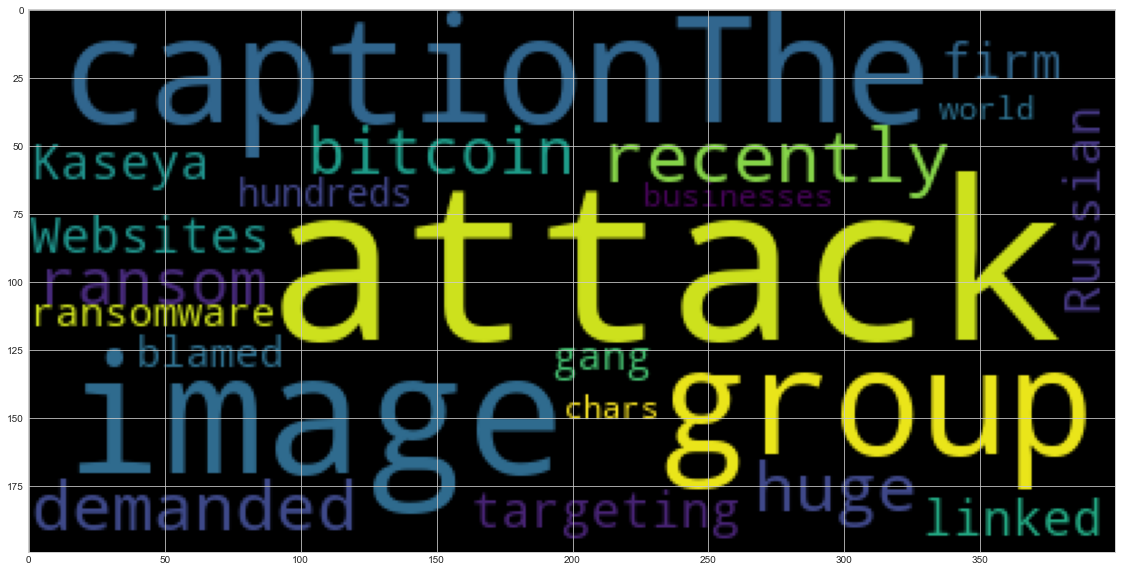

In [25]:
#bitcoin word cloud
btc_wc = WordCloud().generate(bit1)
plt.imshow(btc_wc)

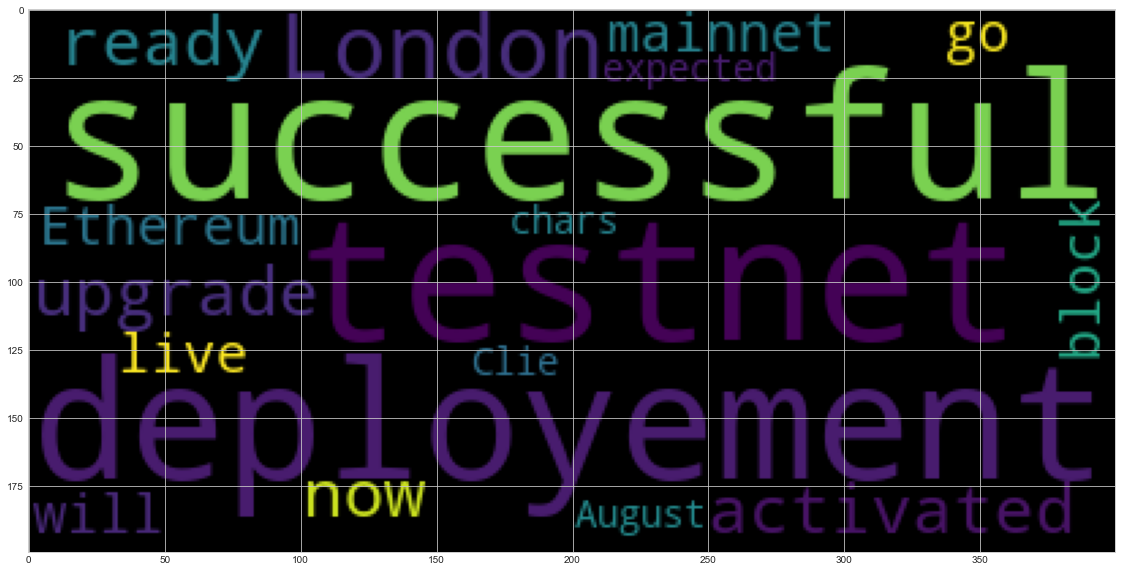

In [26]:
eth_wc = WordCloud().generate(eth1)
plt.imshow(eth_wc)